              endTime           artistName             trackName  msPlayed  \
0 2023-01-08 00:04:00    Rex Orange County       Pluto Projector    267520   
1 2023-01-08 00:08:00            Sam Smith  I'm Not The Only One    239316   
2 2023-01-08 11:40:00         Harry Styles     Sign of the Times    253331   
3 2023-01-08 11:43:00        Viktor Vaughn    Vaudeville Villain    151773   
4 2023-01-08 11:48:00  Nothing But Thieves                 Crazy    278586   

   count day_of_week    month  hour  
0      2      Sunday  January     0  
1      1      Sunday  January     0  
2      6      Sunday  January    11  
3     18      Sunday  January    11  
4      2      Sunday  January    11  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36744 entries, 0 to 36743
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   endTime      36744 non-null  datetime64[ns]
 1   artistName   36744 non-null  object        

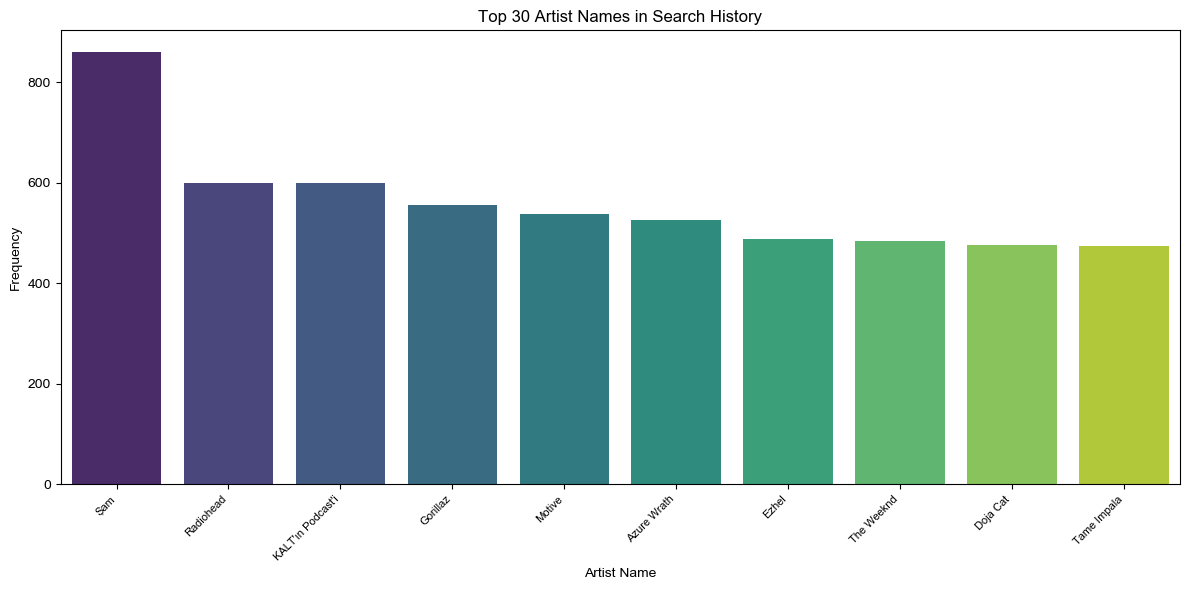

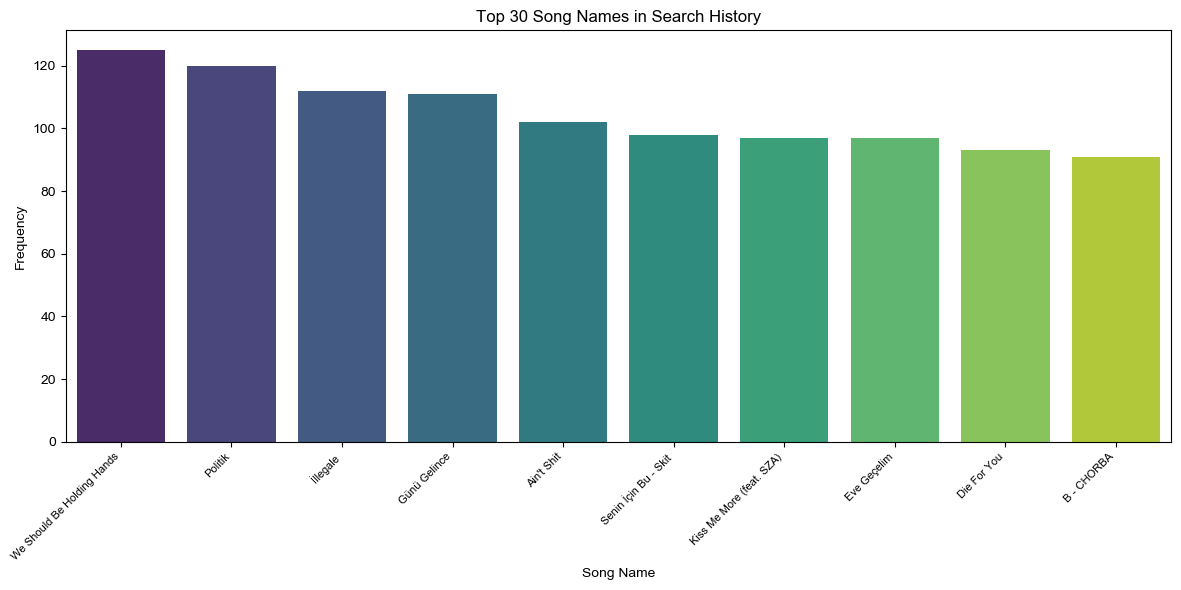

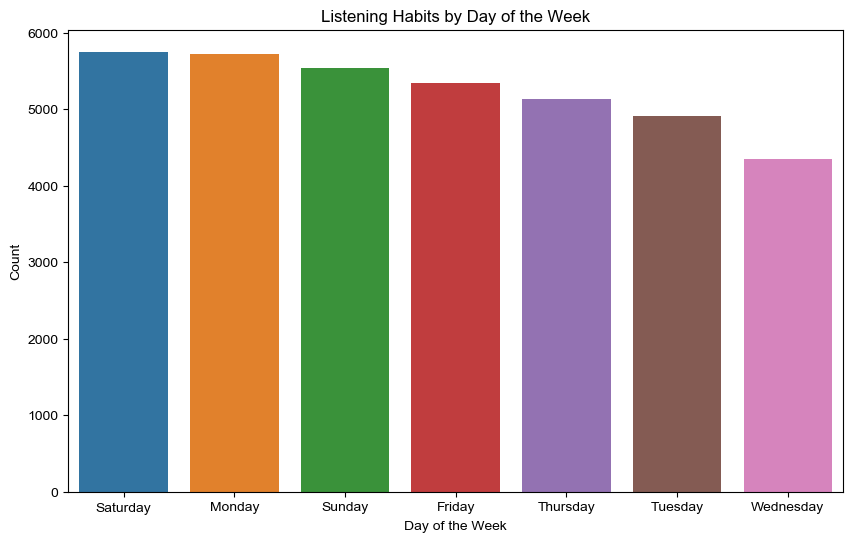

    addedDate     playlist_name last_modified_date  \
0  2022-12-05  Bişiler denencez         2023-02-05   
1  2022-12-05  Bişiler denencez         2023-02-05   
2  2022-12-05  Bişiler denencez         2023-02-05   
3  2022-12-05  Bişiler denencez         2023-02-05   
4  2022-12-05  Bişiler denencez         2023-02-05   

                                 trackName    artistName  \
0                             Karma Police     Radiohead   
1                       You Only Live Once   The Strokes   
2                                 Reptilia   The Strokes   
3                         Taken for a Fool   The Strokes   
4  Love Will Tear Us Apart - 2020 Remaster  Joy Division   

                    albumName                              trackUri  
0                Karma Police  spotify:track:07DvRMhMBY2ue8gMoWZdRP  
1  First Impressions Of Earth  spotify:track:4fPBB44eDH71YohayI4eKV  
2                Room On Fire  spotify:track:57Xjny5yNzAcsxnusKmAfA  
3                      Angles  spo

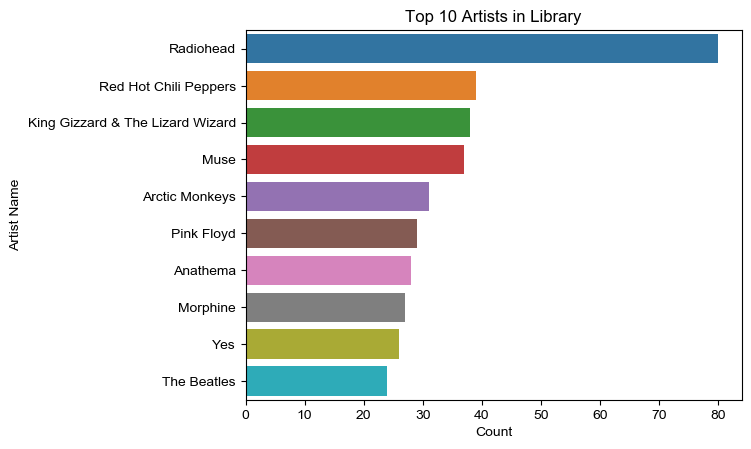

In [87]:


#SEARCH HISTORY EDA
# Display the first few rows of the data
print(SearchHistory.head())

# Get general information about the DataFrame
print(SearchHistory.info())

# Summary statistics for numerical columns
print(SearchHistory.describe())

# Check for missing values
print(SearchHistory.isnull().sum())




# Replace special characters in artist names

SearchHistory['count'] = SearchHistory.groupby(['artistName', 'trackName']).transform('count')['msPlayed']

# Now, drop duplicates to keep only unique combinations of artist and track
UniqueSearchHistory = SearchHistory[['artistName', 'trackName', 'count']].drop_duplicates()

UniqueSearchHistory.head()
top_artists = UniqueSearchHistory.groupby('artistName')['count'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Artists by Total Search Count:\n", top_artists)

top_songs = UniqueSearchHistory.groupby('trackName')['count'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Songs by Total Search Count:\n", top_songs)


UniqueSearchHistory['cleaned_artist'] = UniqueSearchHistory['artistName'].str.replace('[^a-zA-Z0-9]', '_', regex=True)

# Filter out rows with artist names containing unwanted characters
filtered_history = UniqueSearchHistory[~UniqueSearchHistory['cleaned_artist'].str.contains('[^a-zA-Z0-9_]')]

# Visualize the distribution of top 30 artist names
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.title('Top 30 Artist Names in Search History')
plt.xlabel('Artist Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()



# Visualize the distribution of top 30 song names
plt.figure(figsize=(12, 6))
sns.barplot(x=top_songs.index, y=top_songs.values, palette='viridis')
plt.title('Top 30 Song Names in Search History')
plt.xlabel('Song Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

# Convert 'endTime' to datetime format
SearchHistory['endTime'] = pd.to_datetime(SearchHistory['endTime'])

# Extract day of week, month, and hour
SearchHistory['day_of_week'] = SearchHistory['endTime'].dt.day_name()
SearchHistory['month'] = SearchHistory['endTime'].dt.month_name()
SearchHistory['hour'] = SearchHistory['endTime'].dt.hour

# Analyze listening habits by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=SearchHistory, order=SearchHistory['day_of_week'].value_counts().index)
plt.title('Listening Habits by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

#PLAYLIST DATA EDA


# Display the first few rows of the data
print(all_playlists_data.head())

# Get general information about the DataFrame
print(all_playlists_data.info())

# Summary statistics for numerical columns
print(all_playlists_data.describe())

# Check for missing values
print(all_playlists_data.isnull().sum())


# Number of songs per playlist
num_songs_per_playlist = all_playlists_data.groupby('playlist_name').size()
print("Number of songs per playlist", num_songs_per_playlist)

# Variety of artists in each playlist
unique_artists_per_playlist = all_playlists_data.groupby('playlist_name')['artistName'].nunique()
print("Variety of artists in each playlist", unique_artists_per_playlist)

# Most common artists in playlists
top_artists_in_playlists = all_playlists_data['artistName'].value_counts().head(10)
print("Most common artists in playlists", top_artists_in_playlists)

# Most common tracks in playlists
top_tracks_in_playlists = all_playlists_data['trackName'].value_counts().head(10)
print(top_tracks_in_playlists)

#LIBRARY EDA


# Display the first few rows of the data
print(LibraryData.head())

# Get general information about the DataFrame
print(LibraryData.info())

# Summary statistics for numerical columns
print(LibraryData.describe())

# Check for missing values
print(LibraryData.isnull().sum())

top_artists = LibraryData['artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists in Library')
plt.xlabel('Count')
plt.ylabel('Artist Name')
plt.show()


